In [92]:
import pandas as pd
import numpy as np
from class_Stastics import Stastics  # Import the class
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [93]:
# Load an example dataset

dataset = load_breast_cancer(return_X_y=True, as_frame=True)

data = dataset[0]

metadata = dataset[1].to_frame().rename(columns={"target":"Condition"})

metadata["Condition"] = [ "Breast Cancer" if i==1 else "Control" for i in  metadata.Condition]

# Create an age metadata column randomly
metadata["Age"] = (np.random.random(size=metadata.shape[0]) * 80).astype(float)

# Create an instance of the Stastics class
statist = Stastics(data, metadata)

# Show the automaticaly generated description
display(statist.adata.uns["Description_All"])

/home/german/miniconda3/envs/myenv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


,Variable,Class,Count (%),Mean ± Std_dev,Median,Normal Data,IQR
0,Condition,Breast Cancer,357 (62.74),NaN,NaN,NaN,NaN
1,Condition,Control,212 (37.26),NaN,NaN,NaN,NaN
2,Age,NaN,569 (100.0),38.16 ± 22.85,37.04,False,18.12 - 57.07


## PRINCIPAL COMPONENT ANALYSIS

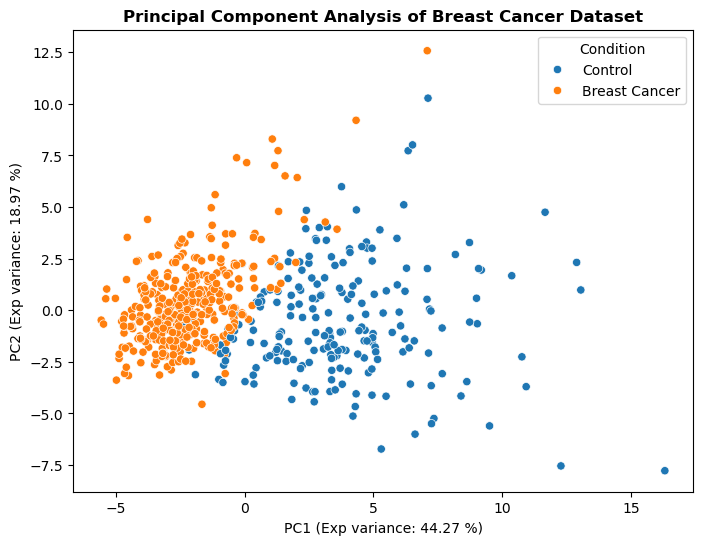

In [94]:
statist.plot_pca(vars=statist.adata.var_names,hue="Condition",title="Principal Component Analysis of Breast Cancer Dataset")

In [95]:

# Filter data based on metadata column (keep the adult patients)
ages = statist.adata.obs.Age[ statist.adata.obs.Age > 25 ].tolist()
statist.filter(var_name="Age", subgroup=ages)




/home/german/Documents/German/github/statistics_class/class_Stastics.py:132: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.adata.uns[f"Description_{name}"] = df_res


/home/german/Documents/German/github/statistics_class/class_Stastics.py:805: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_tick_labels)


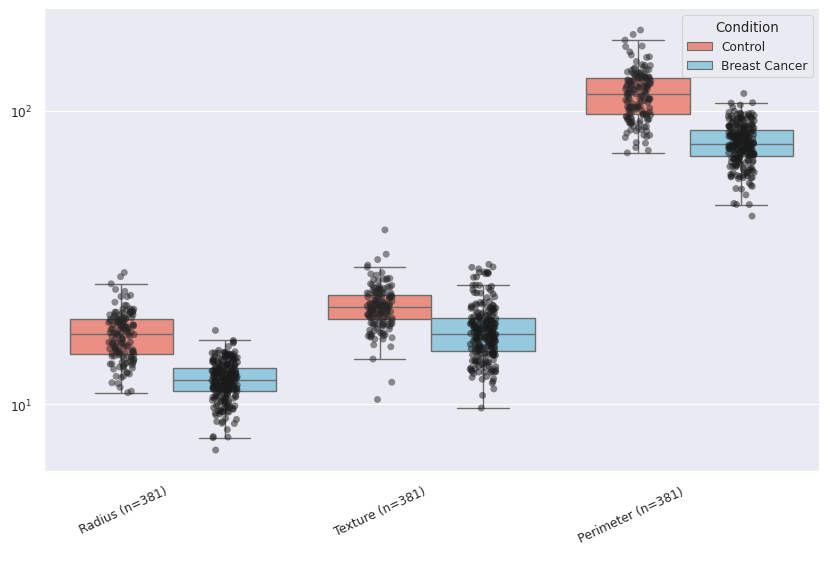

/home/german/Documents/German/github/statistics_class/class_Stastics.py:805: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_tick_labels)


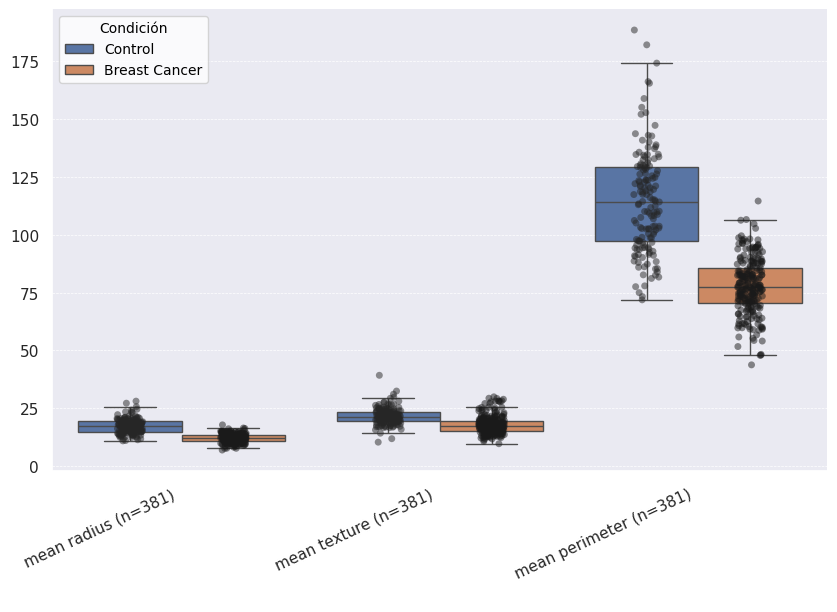

Name,Normal_Data,Test,P-value,Mean_Difference,Hodges_Lehmann_Estimator,N,FDR,Significant
Condition: mean radius,False,Mann-Whitney U,0.0,NaN,5.07,381,8.533750e-45,True
Condition: mean texture,False,Mann-Whitney U,0.0,NaN,3.9,381,1.129538e-20,True
Condition: mean perimeter,False,Mann-Whitney U,0.0,NaN,35.465,381,1.273949e-46,True


In [96]:
# Compare the condition in the first 3 variables and plot their correlation with Age 
for var in statist.adata.var_names[:3]:

    # Perform comparisons between conditions in each variable
    comparison_results = statist.comparisons_1_1(target=var, condition="Condition")


# Plot correlation with age
statist.plot_differences(condition="Condition", vars= statist.adata.var_names[:3],palette=["salmon","skyblue"],kind="Box",
                          ylog=True,theme="paper",tick_label_names=["Radius","Texture","Perimeter"])

# Plot differences in a boxplot
statist.plot_differences(condition="Condition", vars=statist.adata.var_names[:3].tolist(), kind="Box",show="Edit",theme="notebook")
# You can also choose to return the plot in case you want to add some changes
plt.legend(title="Condición",loc="upper left")
plt.show()
display(comparison_results) # Show the report of the comparisons

/home/german/miniconda3/envs/myenv/lib/python3.12/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


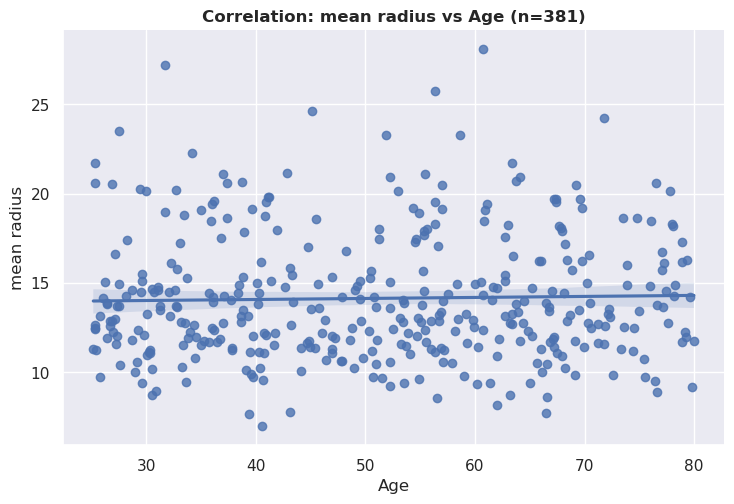

/home/german/miniconda3/envs/myenv/lib/python3.12/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


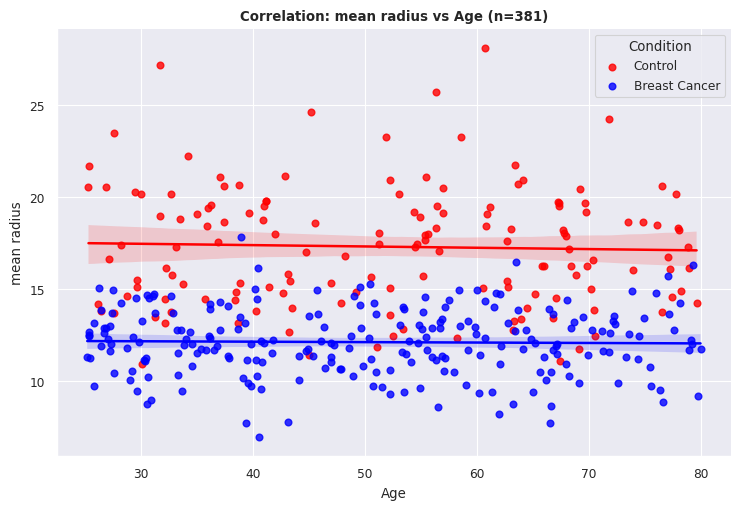

,Variable_1,Variable_2,Correlation,P-value,N,FDR,Significative
Correlated Variables,,,,,,,
Age vs mean radius,mean radius,Age,0.035836,0.485544,381,0.608629,False
Age vs mean texture,mean texture,Age,0.022171,0.666179,381,0.768668,False
Age vs mean perimeter,mean perimeter,Age,0.040643,0.428918,381,0.608629,False
Age vs mean area,mean area,Age,0.036859,0.473165,381,0.608629,False
Age vs mean smoothness,mean smoothness,Age,0.058304,0.256258,381,0.583385,False
Age vs mean compactness,mean compactness,Age,0.090405,0.077995,381,0.475726,False
Age vs mean concavity,mean concavity,Age,0.093479,0.068359,381,0.475726,False
Age vs mean concave points,mean concave points,Age,0.073352,0.153008,381,0.510028,False
Age vs mean symmetry,mean symmetry,Age,0.078347,0.126860,381,0.475726,False


In [97]:
statist.do_correlations(Variables_A="Age",Variables_B=statist.adata.var_names,name="Age_correlations",return_df=False)
# Normal correlation
statist.plot_correlation(var_y="mean radius",var_x="Age",theme="notebook")
# Correlation by condition
statist.plot_correlation(var_y="mean radius",var_x="Age",hue="Condition",palette=["red","blue"],theme="paper")
statist.adata.uns["Age_correlations"]